In [30]:
from fastai.vision import *

In [31]:
path = Path('C:/Users/Adrian/Desktop/watch finder/data')

In [32]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers=4).normalize(imagenet_stats)

In [33]:
data.classes

['armani',
 'audemarspiguet',
 'breitling',
 'cartier',
 'fossil',
 'gucci',
 'guess',
 'iwc',
 'jaegerlecoultre',
 'michaelkores',
 'movado',
 'omega',
 'panerai',
 'patekphilippe',
 'rolex',
 'seiko',
 'zenith']

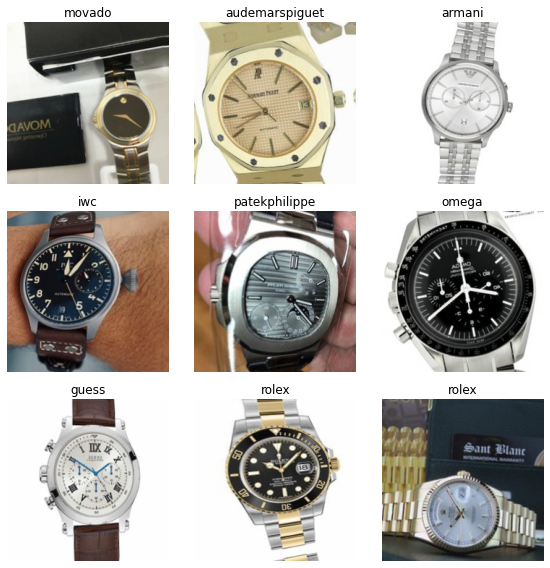

In [34]:
data.show_batch(rows=3, figsize=(8,8))

In [35]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['armani',
  'audemarspiguet',
  'breitling',
  'cartier',
  'fossil',
  'gucci',
  'guess',
  'iwc',
  'jaegerlecoultre',
  'michaelkores',
  'movado',
  'omega',
  'panerai',
  'patekphilippe',
  'rolex',
  'seiko',
  'zenith'],
 17,
 4299,
 1074)

In [8]:
from fastai.metrics import error_rate

In [9]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

c:\users\adrian\appdata\local\programs\python\python37\lib\site-packages\fastai\vision\learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [10]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (4299 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
armani,armani,armani,armani,armani
Path: C:\Users\Adrian\Desktop\watch finder\data;

Valid: LabelList (1074 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
movado,michaelkores,guess,omega,movado
Path: C:\Users\Adrian\Desktop\watch finder\data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   

In [11]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.167314,1.803499,0.515829,00:42
1,2.296468,1.500334,0.448790,00:39
2,1.755205,1.307055,0.407821,00:39
3,1.437676,1.226729,0.378026,00:40
4,1.250363,1.209049,0.377095,00:40


In [60]:
learn.predict(data.valid_ds[1][0])

(Category guess,
 tensor(6),
 tensor([0.0659, 0.0018, 0.0025, 0.0030, 0.0199, 0.0552, 0.5504, 0.0122, 0.0393,
         0.1133, 0.0248, 0.0120, 0.0025, 0.0285, 0.0112, 0.0054, 0.0520]))

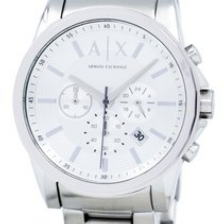

In [61]:
data.valid_ds[1][0]

In [14]:
interpret = ClassificationInterpretation.from_learner(learn)

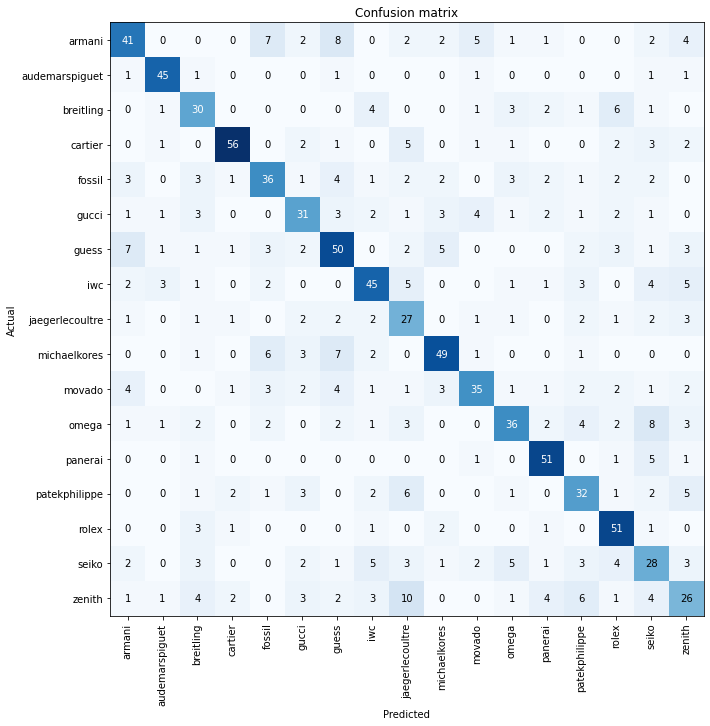

In [18]:
interpret.plot_confusion_matrix(figsize=(10,10))

In [58]:
learn.save('stage-1')

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


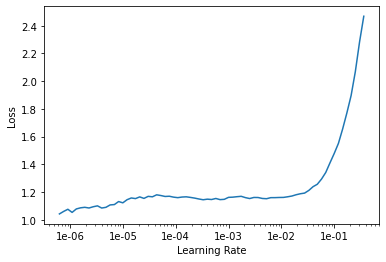

In [21]:
learn.recorder.plot()

In [57]:
learn.unfreeze()

In [62]:
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.592170,3.164116,0.616387,00:50
1,1.706378,1.677773,0.470205,00:48
2,1.269600,1.318155,0.388268,00:50
3,0.837717,0.758166,0.226257,00:49
4,0.477828,0.665774,0.201117,00:48


In [63]:
learn.predict(data.valid_ds[1][0])

(Category armani,
 tensor(0),
 tensor([7.6076e-01, 2.0334e-04, 6.8953e-05, 6.3781e-04, 3.0928e-03, 7.8624e-04,
         1.1494e-03, 1.6502e-04, 2.0087e-04, 2.2606e-01, 6.2152e-03, 1.9897e-05,
         2.3656e-04, 1.1945e-04, 8.3468e-05, 1.1339e-04, 8.8697e-05]))

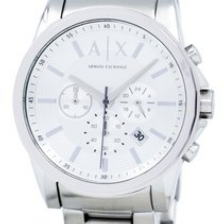

In [64]:
data.valid_ds[1][0]

In [65]:
learn.save('stage-2')

In [66]:
learn.export('watch-classifier.pkl')